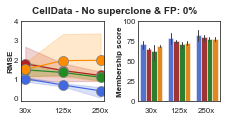

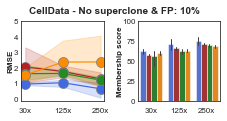

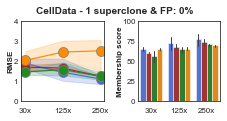

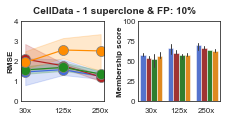

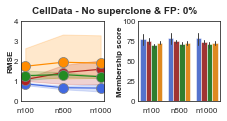

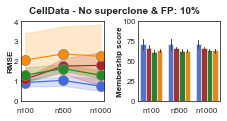

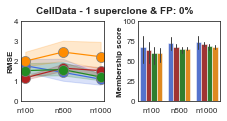

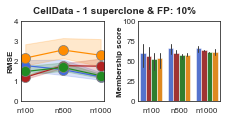

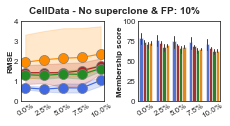

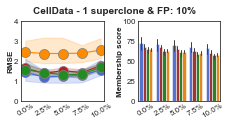

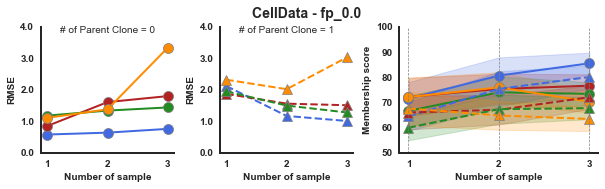

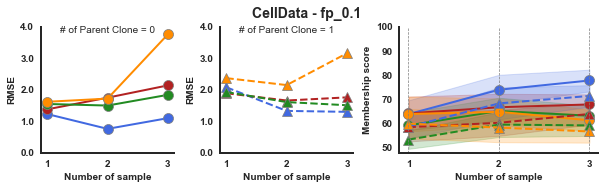

In [1]:
import numpy as np 
import pandas as pd
import os, glob, math
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import palettable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

for subdir in ["by_depth", "by_fpratio", "by_numclone", "by_numblock", "by_nummutation",  "proportions", "with_simpleKmeans", "Sex_chromosome"]:
    OUTPUT_DIR = "/data/project/Alzheimer/YSscript/cle/Revision/" + str (subdir)
    if os.path.exists(OUTPUT_DIR) == False:
        os.system("mkdir -p " + OUTPUT_DIR)

tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

#colorlist = [i for i in safe7]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", Gr_10[6], Gr_10[5], Gr_10[4]]
sns.set_style("white")
#sns.set_palette("tab10")
sns.set_palette(sns.color_palette(colorlist))



def drawfigure (long_df, x, title, saveloc ):
    # Create a grouped bar graph
    fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize =  (7.8 / 2.54, 4 / 2.54))
    fig.subplots_adjust ( wspace = 0.4, bottom = 0.15, top = 0.85, left = 0.08, right = 0.98)
    
    long_df = long_df.sort_values (by = [ "NUM_BLOCK", x ], ascending = True).reset_index (drop = True)
    long_df[ x ] = long_df[ x ].astype(str)

    sns.lineplot(data = long_df, x = x, y = 'EC', hue = 'tool', 
                    linewidth = 1.2, marker = 'o',  markersize = 10,
                    markeredgecolor = "gray", 
                    err_style = "band", errorbar=('ci', 95), ax = ax[0])
    ax[0].set_xlabel( None )
    ax[0].set_ylabel( "RMSE", fontsize = 8, fontweight = "semibold" )
    ax[0].yaxis.set_label_coords( -0.10, 0.5)   # 왼쪽으로 살짝 이동

    ax[0].set_xticks ( sorted(list ( set(long_df[x])) ) ) 
    ax[0].legend_.remove()
    if x == "DEPTH_MEAN":
        ax[0].set_xticklabels ( [ str(i) + str ("x") for i in sorted( list ( set(long_df[x]) ) ) ] , fontsize = 8, fontweight = "normal"  ) 
    if x == "NUM_MUTATION":
        ax[0].set_xticklabels ( [ str("n") + str(i)  for i in sorted( list ( set(long_df[x]) ) ) ] , fontsize = 8, fontweight = "normal" ) 
    if x == "FP_RATIO":
        ax[0].set_xticklabels ( [ str(i * 100) + str ("%") for i in sorted( list ( set(long_df[x].astype(float)) ) ) ] , fontsize = 8, fontweight = "normal" ) 
        ax[0].tick_params(axis = 'x', rotation = 30, pad = -2.2)
    ax[0].set_yticks ( np.arange (0, math.ceil (max(long_df["EC"])) + 0.1, 1).astype(int) )
    ax[0].tick_params(axis = 'y', pad = 0) 
    ax[0].set_yticklabels ( ax[0].get_yticks(), fontsize = 8, fontweight = "normal")

    #ax[0].legend ( title = None, labels = ["CLEMENT", "pyclone", "sciclone", "qc"] )


    sns.barplot(data = long_df, x = x, y = 'MS', hue = 'tool', 
                    linewidth = 0.5, 
                    #edgecolor='gray', 
                    errwidth = 1,
                    dodge = True,
                    ax = ax[1])
    ax[1].set_xlabel( None )
    ax[1].set_ylabel( "Membership score", fontsize = 8, fontweight = "semibold" )
    ax[1].yaxis.set_label_coords( -0.18, 0.5)   # ylabel을 왼쪽으로 살짝 이동

    ax[1].legend_.remove()
    if x == "DEPTH_MEAN":
        ax[1].set_xticklabels ( [ str(i) + str ("x") for i in sorted( list ( set( long_df[x].astype(int) ) ) ) ] , fontsize = 8, fontweight = "normal" ) 
    if x == "NUM_MUTATION":
        ax[1].set_xticklabels ( [ str("n") + str(i)  for i in sorted( list ( set( long_df[x].astype(int) ) ) ) ] , fontsize = 8, fontweight = "normal" ) 
    if x == "FP_RATIO":
        ax[1].set_xticklabels ( [ str(i * 100) + str ("%") for i in sorted( list ( set( long_df[x].astype(float) ) ) ) ] , fontsize = 8, fontweight = "normal" ) 
        ax[1].tick_params(axis = 'x', rotation = 30, pad = -2.2)
    ax[1].set_yticks ( np.arange (0, math.ceil (max(long_df["MS"]) / 100) * 100 + 1, 25) )
    ax[1].tick_params(axis = 'y', pad = -1.5) 
    ax[1].set_yticklabels ( ax[1].get_yticks(), fontsize = 8, fontweight = "normal")
    

    plt.suptitle( title , fontsize = 10, y = 0.98, fontweight = "semibold" )
    #fig.text (x = 0.5, y = 0.02, ha = "center", s = "{}".format( x ), fontsize = 10, fontweight = "semibold")

    plt.savefig ( saveloc, dpi = 300 )
    plt.show()

    
    # # Create Figure 2 for the legend
    # fig_legend, ax_legend = plt.subplots( nrows = 1, ncols = 1, figsize = (12, 1) )

    # # Extract the legend from Figure 1 and add it to Figure 2
    # ax_legend.add_artist( legend_s )
    # sns.despine(ax=ax_legend, left=True, right=True, top=True, bottom=True)
    # ax_legend.set_xticks([])
    # ax_legend.set_yticks([])
    # ax_legend.set_xlabel( None )
    # ax_legend.set_ylabel( None )

    # # Show or save Figure 2
    # plt.show()

##############################################################################################################################################################################################################################################

def bm_by_depth ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST):
    #toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

    for NUM_PARENT in NUM_PARENT_LIST:        
        for FP_RATIO in FP_RATIO_LIST:
            for AXIS_RATIO in AXIS_RATIO_LIST:        
                long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "NUM_PARENT", "FP_RATIO", "AXIS_RATIO", "tool", "MS", "ARI", "EC"] )
            
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    for NUM_BLOCK in NUM_BLOCK_LIST:
                        for NUM_MUTATION in NUM_MUTATION_LIST:
                            INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/BM_FINAL.tsv") )

                            for INPUT_DIR in INPUT_DIR_LIST:
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue
                                    
                                df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                                for tool in toollist:
                                    long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO, tool, df.loc [tool][1], df.loc [tool][5], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가

                long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize    
                long_df[["NUM_BLOCK", "DEPTH_MEAN", "NUM_MUTATION", "NUM_PARENT"]] = long_df[["NUM_BLOCK", "DEPTH_MEAN", "NUM_MUTATION", "NUM_PARENT"]].astype(int)
                long_df[["FP_RATIO", "MS", "ARI", "EC"]] = long_df[["FP_RATIO", "MS", "ARI", "EC"]].astype(float)
                if NUM_PARENT == 0:
                    drawfigure (long_df, 'DEPTH_MEAN', "CellData - No superclone & FP: {}%".format ( int( FP_RATIO * 100) ), "/data/project/Alzheimer/YSscript/cle/Revision/by_depth/2.CellData-bydepth_parent_{}_{}.pdf".format (NUM_PARENT, FP_RATIO))
                else:
                    drawfigure (long_df, 'DEPTH_MEAN', "CellData - {} superclone & FP: {}%".format (NUM_PARENT, int( FP_RATIO * 100) ), "/data/project/Alzheimer/YSscript/cle/Revision/by_depth/2.CellData-bydepth_parent_{}_{}.pdf".format (NUM_PARENT, FP_RATIO))

                # tsv로 정리해서 저장하기
                tt = pd.concat ( [  round (long_df.groupby (["DEPTH_MEAN", "tool"])["EC"].mean() , 2),  round (long_df.groupby (["DEPTH_MEAN", "tool"])["EC"].min() , 2),  round (long_df.groupby (["DEPTH_MEAN", "tool"])["EC"].max() , 2), round (long_df.groupby (["DEPTH_MEAN", "tool"])["MS"].mean() , 2), round (long_df.groupby (["DEPTH_MEAN", "tool"])["ARI"].mean() , 2) ] , axis = 1)
                tt.columns = ["RMSE_mean", "RMSE_min", "RMSE_max", "MS_mean", "ARI_mean"]
                tt = tt.astype ( {"RMSE_mean" : "str", "RMSE_min" : "str", "RMSE_max" : "str", "MS_mean" : "str", "ARI_mean" : "str"})
                k = 0
                while k < tt.shape[0]:
                    MS_ratio =  [ float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+1]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+2]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+3]["MS_mean"]) ]
                    ARI_ratio =  [ float(tt.iloc[k]["ARI_mean"]) / float(tt.iloc[k+1]["ARI_mean"]), float(tt.iloc[k]["ARI_mean"]) / float(tt.iloc[k+2]["ARI_mean"]), float(tt.iloc[k]["ARI_mean"]) / float(tt.iloc[k+3]["ARI_mean"]) ]
                    tt.iloc[k, 3] = tt.iloc[k]["MS_mean"] + " ({}-{}% ↑)".format ( round ( min (MS_ratio) * 100, 1), round ( max (MS_ratio) * 100, 1) )
                    tt.iloc[k, 4] = tt.iloc[k]["ARI_mean"] + " ({}-{}% ↑)".format ( round ( min (ARI_ratio) * 100, 1), round ( max (ARI_ratio) * 100, 1) )
                    k += len(toollist)
                tt.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/by_depth/2.CellData-bydepth_parent_{}_{}.tsv".format (NUM_PARENT, FP_RATIO),  sep = "\t", index = True)

    return long_df

def bm_by_nummutation ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST):

    for NUM_PARENT in NUM_PARENT_LIST:        
        for FP_RATIO in FP_RATIO_LIST:
            for AXIS_RATIO in AXIS_RATIO_LIST:        
                long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "NUM_PARENT", "FP_RATIO", "AXIS_RATIO", "tool", "MS", "EC"] )
            
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    for NUM_BLOCK in NUM_BLOCK_LIST:
                        for NUM_MUTATION in NUM_MUTATION_LIST:
                            INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/BM_FINAL.tsv") )

                            for INPUT_DIR in INPUT_DIR_LIST:
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue

                                df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                                for tool in toollist:
                                    long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO, tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
                    
                long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize
                if NUM_PARENT == 0:
                    drawfigure (long_df, 'NUM_MUTATION', "CellData - No superclone & FP: {}%".format ( int( FP_RATIO * 100) ), "/data/project/Alzheimer/YSscript/cle/Revision/by_nummutation/2.CellData-bynummutation_parent_{}_{}.pdf".format (NUM_PARENT, FP_RATIO))
                else:
                    drawfigure (long_df, 'NUM_MUTATION', "CellData - {} superclone & FP: {}%".format (NUM_PARENT, int( FP_RATIO * 100) ), "/data/project/Alzheimer/YSscript/cle/Revision/by_nummutation/2.CellData-bynummutation_parent_{}_{}.pdf".format (NUM_PARENT, FP_RATIO))

                # tsv로 정리해서 저장하기
                tt = pd.concat ( [  round (long_df.groupby (["NUM_MUTATION", "tool"])["EC"].mean() , 2), round (long_df.groupby (["NUM_MUTATION", "tool"])["MS"].mean() , 2)] , axis = 1)
                tt.columns = ["RMSE_mean", "MS_mean"]
                tt = tt.astype ( {"RMSE_mean" : "str", "MS_mean" : "str"})
                k = 0
                while k < tt.shape[0]:
                    MS_ratio =  [ float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+1]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+2]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+3]["MS_mean"]) ]
                    tt.iloc[k, 1] = tt.iloc[k]["MS_mean"] + " ({}-{}% ↑)".format ( round ( min (MS_ratio) * 100, 1), round ( max (MS_ratio) * 100, 1) )
                    k += len(toollist)
                tt.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/by_nummutation/2.CellData-bynummutation_parent_{}_{}.tsv".format (NUM_PARENT, FP_RATIO),  sep = "\t", index = True)

    return long_df

def bm_by_fpratio ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST):

    for NUM_PARENT in NUM_PARENT_LIST:        
        long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "NUM_PARENT", "FP_RATIO", "AXIS_RATIO", "tool", "MS", "MS_std", "EC", "EC_std" ] )
        for FP_RATIO in FP_RATIO_LIST:
            for AXIS_RATIO in AXIS_RATIO_LIST:            
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    for NUM_MUTATION in NUM_MUTATION_LIST:
                        for NUM_BLOCK in NUM_BLOCK_LIST:
                            INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/BM_FINAL.tsv") )

                            for INPUT_DIR in INPUT_DIR_LIST:
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue

                                df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                                for tool in toollist:
                                    long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO, tool, df.loc [tool][1], df.loc [tool][2] ,df.loc [tool][3], df.loc [tool][4] ]   # 맨 끝에 하나씩 추가
                    
        long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize
        long_df["MS_std"] = long_df["MS_std"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 표준편차도 normalize
        if NUM_PARENT == 0:
            drawfigure (long_df, 'FP_RATIO', "CellData - No superclone & FP: {}%".format ( int( FP_RATIO * 100) ), "/data/project/Alzheimer/YSscript/cle/Revision/by_fpratio/2.CellData-byfpratio_parent_{}.pdf".format (NUM_PARENT ))
        else:
            drawfigure (long_df, 'FP_RATIO', "CellData - {} superclone & FP: {}%".format (NUM_PARENT, int( FP_RATIO * 100) ), "/data/project/Alzheimer/YSscript/cle/Revision/by_fpratio/2.CellData-byfpratio_parent_{}.pdf".format (NUM_PARENT ))

        # tsv로 정리해서 저장하기

        tt = pd.concat ( [  round (long_df.groupby (["FP_RATIO", "tool"])["MS"].mean() , 2), round (long_df.groupby (["FP_RATIO", "tool"])["EC"].mean() , 2)] , axis = 1)
        tt.columns = ["MS_mean", "RMSE_mean"]
        tt = tt.astype ( {"MS_mean" : "str", "RMSE_mean" : "str"})
        k = 0
        while k < tt.shape[0]:
            MS_ratio =  [ float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+1]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+2]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+3]["MS_mean"]) ]
            tt.iloc[k, 0] = tt.iloc[k]["MS_mean"] + " ({}-{}% ↑)".format ( round ( min (MS_ratio) * 100, 1), round ( max (MS_ratio) * 100, 1) )
            k += len(toollist)
        tt.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/by_fpratio/2.CellData-byfpratio_parent_{}.tsv".format (NUM_PARENT ),  sep = "\t", index = True)
    
    return long_df

############################################################################# MAIN FIGURE #############################################################################

def drawfigure_numblock (long_df, title, saveloc ):
    import matplotlib.gridspec as gridspec

    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    #colorlist = [i for i in safe7]
    colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", Gr_10[6], Gr_10[5], Gr_10[4]]
    sns.set_style("white")
    #sns.set_palette("tab10")
    sns.set_palette(sns.color_palette(colorlist))

    # Create a asymmetric axes
    fig = plt.figure(figsize=(9, 2.5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[2, 2, 3])      # Create subplots with different widths
    ax = [plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2])]
    fig.subplots_adjust ( wspace = 0.3, bottom = 0.17, top = 0.87, left = 0.09, right = 0.95)

    plt.suptitle( title , fontsize = 14, y = 0.98, fontweight = "semibold" )


    # A.
    sns.lineplot(data = long_df[long_df["NUM_PARENT"] == 0], x = "NUM_BLOCK", y = 'EC', hue = 'tool', 
                linewidth = 2, linestyle = "-", marker = 'o',  markersize = 10, markeredgecolor = "gray", 
                errorbar=None, ax = ax[0])
    ax[0].set_xlabel( "Number of sample", fontsize = 10, fontweight = "semibold" )
    ax[0].set_ylabel( "RMSE", fontsize = 10, fontweight = "semibold" )    
    ax[0].set_xticks ( sorted(list ( set(long_df["NUM_BLOCK"])) ) ) 
    ax[0].set_yticks ( np.arange (0, math.ceil ( np.max ( long_df["EC"] ) ) + 0.1, 1) ) 
    ax[0].set_xticklabels ( ax[0].get_xticks(), fontweight = "semibold" ) 
    ax[0].set_yticklabels ( [ round (float(i) ,2) for i in ax[0].get_yticks() ], fontweight = "semibold" )  # RMSE 뒤에 .0 붙여주기
    ax[0].text  (x = np.array (ax[0].get_xlim()).mean(), y =  np.array (ax[0].get_ylim())[1] * 0.95, ha = "center", s = "# of Parent Clone = 0", fontsize = 10, fontweight = "normal" )   # 제목 붙여주기
    for axis in ['left','bottom']:
        ax[0].spines[axis].set_linewidth(2)
    sns.despine ( top = True, right = True, ax = ax[0])
    ax[0].legend_.remove()
    
    # B.
    sns.lineplot(data = long_df[long_df["NUM_PARENT"] == 1], x = "NUM_BLOCK", y = 'EC', hue = 'tool', 
                linewidth = 2, linestyle = "--", marker = '^',  markersize = 10, markeredgecolor = "gray", 
                errorbar=None, ax = ax[1])
    
    ax[1].set_xlabel( "Number of sample", fontsize = 10, fontweight = "semibold" )
    ax[1].set_ylabel( "RMSE", fontsize = 10, fontweight = "semibold" )    
    ax[1].set_xticks ( sorted(list ( set(long_df["NUM_BLOCK"])) ) ) 
    ax[1].set_yticks ( np.arange (0, math.ceil ( np.max ( long_df["EC"] ) ) + 0.1, 1) ) 
    ax[1].set_xticklabels ( ax[1].get_xticks(), fontweight = "semibold" ) 
    ax[1].set_yticklabels ( [ round (float(i) ,2) for i in ax[1].get_yticks() ] , fontweight = "semibold" )  # RMSE 뒤에 .0 붙여주기
    ax[1].text  (x = np.array (ax[1].get_xlim()).mean(), y =  np.array (ax[1].get_ylim())[1] * 0.95, ha = "center", s = "# of Parent Clone = 1", fontsize = 10, fontweight = "normal" ) 
    sns.despine ( top = True, right = True, ax = ax[1])
    for axis in ['left','bottom']:
        ax[1].spines[axis].set_linewidth(2)
    ax[1].legend_.remove()


    # C.
    sns.lineplot(data = long_df[long_df["NUM_PARENT"] == 0], x = "NUM_BLOCK", y = 'MS', hue = 'tool', 
                    linewidth = 2, linestyle = "-", marker = 'o',  markersize = 10, markeredgecolor = "gray", 
                    err_style = "band", errorbar=('ci', 95), ax = ax[2])
    sns.lineplot(data = long_df[long_df["NUM_PARENT"] == 1], x = "NUM_BLOCK", y = 'MS', hue = 'tool', 
                    linewidth = 2, linestyle = "--", marker = '^',  markersize = 10, markeredgecolor = "gray", 
                    err_style = "band", errorbar=('ci', 95), ax = ax[2])

    # draw errorbar manually
    for NUM_PARENT in set (long_df["NUM_PARENT"]):
        for tool_index, tool in enumerate ( toollist ):
            err_x_np = np.array( [] )
            err_y_upper_np, err_y_lower_np = np.array( [] ), np.array( [] )
            for NUM_BLOCK in set (long_df["NUM_BLOCK"]):
                y_center = float ( long_df[ (long_df["NUM_PARENT"] == NUM_PARENT) & (long_df["NUM_BLOCK"] == NUM_BLOCK) & (long_df["tool"] == tool)]["MS"] ) 
                y_std = float ( long_df[ (long_df["NUM_PARENT"] == NUM_PARENT) & (long_df["NUM_BLOCK"] == NUM_BLOCK) & (long_df["tool"] == tool)]["MS_std"] ) 
                err_x_np = np.append (err_x_np, NUM_BLOCK)
                err_y_upper_np = np.append (err_y_upper_np, y_center + (y_std / 1.95))
                err_y_lower_np = np.append (err_y_lower_np, y_center - (y_std / 1.95) )
            
            #print (y_center, y_std / 1.95)
            ax[2].fill_between(err_x_np, err_y_lower_np, err_y_upper_np, color = colorlist[tool_index], alpha=0.2)

    # 격자무늬
    for NUM_BLOCK in set (long_df["NUM_BLOCK"]):
        ax[2].axvline(x = NUM_BLOCK, color = 'gray', linestyle='--', linewidth = 0.7)

    ax[2].set_xlabel( "Number of sample", fontsize = 10, fontweight = "semibold" )
    ax[2].set_ylabel( "Membership score", fontsize = 10, fontweight = "semibold" )
    ax[2].set_xticks ( sorted(list ( set(long_df["NUM_BLOCK"])) ) ) 
    ax[2].set_yticks ( np.arange ( math.floor ( np.min ( long_df["MS"] ) / 10 ) * 10, 100.01, 10).astype(np.int32) ) 
    ax[2].set_xticklabels ( ax[2].get_xticks(), fontweight = "semibold" ) 
    ax[2].set_yticklabels ( ax[2].get_yticks(), fontweight = "semibold" ) 
    sns.despine ( top = True, right = True, ax = ax[2])
    for axis in ['left','bottom']:
        ax[2].spines[axis].set_linewidth(2)
    ax[2].legend_.remove()

    plt.savefig ( saveloc, dpi = 300 )
    plt.show()



def bm_by_numblock ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST ):

    for FP_RATIO in FP_RATIO_LIST:
        long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "NUM_PARENT", "FP_RATIO", "AXIS_RATIO", "tool", "MS", "MS_std", "EC", "EC_std", "ARI", "ARI_std"] )
        for AXIS_RATIO in AXIS_RATIO_LIST:        
            for NUM_PARENT in NUM_PARENT_LIST:        
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    for NUM_MUTATION in NUM_MUTATION_LIST:
                        for NUM_BLOCK in NUM_BLOCK_LIST:
                            INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/BM_FINAL.tsv") )

                            for INPUT_DIR in INPUT_DIR_LIST:
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue

                                df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                                for tool in toollist:
                                    long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO, tool, df.loc [tool][1], df.loc [tool][2] ,df.loc [tool][3], df.loc [tool][4], df.loc [tool][5], df.loc [tool][6]  ]   # 맨 끝에 하나씩 추가

        long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize
        long_df["MS_std"] = long_df["MS_std"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 표준편차도 normalize
        drawfigure_numblock (long_df, "CellData - fp_{}".format (FP_RATIO), "/data/project/Alzheimer/YSscript/cle/Revision/by_numblock/2.CellData-bynumblock_{}.pdf".format (FP_RATIO))
    
        # tsv로 정리해서 저장하기
        for NUM_PARENT in NUM_PARENT_LIST:        
            tt = pd.concat ( [  round (long_df[long_df["NUM_PARENT"] == NUM_PARENT].groupby (["NUM_BLOCK", "tool"])["EC"].mean() , 2), round (long_df[long_df["NUM_PARENT"] == NUM_PARENT].groupby (["NUM_BLOCK", "tool"])["MS"].mean() , 2), round (long_df[long_df["NUM_PARENT"] == NUM_PARENT].groupby (["NUM_BLOCK", "tool"])["ARI"].mean() , 2)  ] , axis = 1)
            tt.columns = ["RMSE_mean", "MS_mean", "ARI_mean"]
            tt = tt.astype ( {"RMSE_mean" : "str", "MS_mean" : "str" , "ARI_mean" : "str" })
            k = 0
            while k < tt.shape[0]:
                MS_ratio =  [ float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+1]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+2]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+3]["MS_mean"]) ]
                tt.iloc[k, 1] = tt.iloc[k]["MS_mean"] + " ({}-{}% ↑)".format ( round ( min (MS_ratio) * 100, 1), round ( max (MS_ratio) * 100, 1) )
                k += len(toollist)
            tt.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/by_numblock/2.CellData-bynumblock_{}_parent{}.tsv".format (FP_RATIO, NUM_PARENT),  sep = "\t", index = True)

    return long_df

######################################################################################################################################################################


def find_example ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST, BENCHMARK_LIST):
    import ast

    long_df = pd.DataFrame ( columns = [ "NUM_BLOCK", "NUM_MUTATION", "DEPTH_MEAN", "NUM_PARENT", "FP_RATIO", "SAMPLENAME", "BENCHMARK_NO", "CLEMENT_DECISION",  "FP_EXISTENCE", "len(FP)", "tool", "MS", "ARI", "NUM_CLONE_ans", "NUM_CLONE", "NUM_CHILD", "EC_pyclonevi", "EC_sciclone", "EC_quantumclone"] )
    kwargs = {}
    for FP_RATIO in FP_RATIO_LIST:
        for AXIS_RATIO in AXIS_RATIO_LIST:  
            RMSE_df = pd.DataFrame ( columns = ["NUM_BLOCK", "NUM_CLONE", "tool", "RMSE"] )
        
            for NUM_MUTATION in NUM_MUTATION_LIST:
                for DEPTH_MEAN in DEPTH_MEAN_LIST:

                    for NUM_PARENT in NUM_PARENT_LIST:
                        for NUM_BLOCK in NUM_BLOCK_LIST:        
                            INPUT_DIR_LIST = sorted ( glob.glob ( "/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/*" ) )
                                
                            for INPUT_DIR in INPUT_DIR_LIST:
                                if os.path.isdir (INPUT_DIR) == False:
                                    continue
                                SAMPLENAME = kwargs["SAMPLENAME"] = INPUT_DIR.split("/")[-1]  #"M1-2", "M1-2_M1-4"
                                if kwargs["SAMPLENAME"].count("_") == 0:  # 1D
                                    NUM_CLONE_ans = 3 if  "M1" in kwargs["SAMPLENAME"] else 4
                                elif kwargs["SAMPLENAME"].count("_") == 1:  # 2D
                                    if kwargs["SAMPLENAME"].count("M1") == 2:
                                        NUM_CLONE_ans = 3
                                    if kwargs["SAMPLENAME"].count("M2") == 2:
                                        NUM_CLONE_ans = 4
                                    if (kwargs["SAMPLENAME"].count("M1") == 1) & (kwargs["SAMPLENAME"].count("M2") == 1):
                                        NUM_CLONE_ans = 5
                                elif kwargs["SAMPLENAME"].count("_") == 2:  #3D
                                    if kwargs["SAMPLENAME"].count("M1") == 3:   # "M1-4_M1-6_M1-8"
                                        NUM_CLONE_ans = 3
                                    elif (kwargs["SAMPLENAME"].count("M2") == 3) | (kwargs["SAMPLENAME"].count("M3") == 3) :    # "M2-2_M2-4_M2-8"
                                        NUM_CLONE_ans = 4 
                                    elif (kwargs["SAMPLENAME"].count("M1") == 1) & (kwargs["SAMPLENAME"].count("M2") == 1) & (kwargs["SAMPLENAME"].count("M3") == 1) :    # "M1-1_M2-1_M3_1"
                                        NUM_CLONE_ans = 6
                                    else:
                                        NUM_CLONE_ans = 5
                                NUM_CLONE_ans += int ( NUM_PARENT )      # parent 개수를 더해주기

                                
                                for BENCHMARK_NO in range (BENCHMARK_LIST[0], BENCHMARK_LIST[1] + 1):
                                    INPUT_DIR_BENCHMARK_NO = INPUT_DIR + "/" + str(BENCHMARK_NO)

                                    if not os.path.exists ( INPUT_DIR_BENCHMARK_NO + "/result/CLEMENT_decision.results.txt" ):
                                        print (INPUT_DIR_BENCHMARK_NO + "/result/CLEMENT_decision.results.txt 없음" )
                                        continue
                                    if not os.path.exists ( INPUT_DIR_BENCHMARK_NO + "/result/pyclonevi.results.txt" ):
                                        #print (INPUT_DIR_BENCHMARK_NO + "/result/pyclonevi.results.txt 없음" )
                                        continue
                                    if not os.path.exists ( INPUT_DIR_BENCHMARK_NO + "/result/sciclone.results.txt" ):
                                        #print (INPUT_DIR_BENCHMARK_NO + "/result/sciclone.results.txt 없음" )
                                        continue
                                    if not os.path.exists ( INPUT_DIR_BENCHMARK_NO + "/result/quantumclone.results.txt" ):
                                        #print (INPUT_DIR_BENCHMARK_NO + "/result/quantumclone.results.txt 없음" )
                                        continue

                                    #print (INPUT_DIR_BENCHMARK_NO)
            
                                    with open( INPUT_DIR_BENCHMARK_NO + "/result/CLEMENT_decision.evidence.txt", "r") as file:
                                        df1 = file.readline().rstrip("\n").split("\t")
                                        df1 = pd.DataFrame (df1).T
                                        df1 = df1.set_index ( df1.columns[0] )
                                    df2 = pd.read_csv ( INPUT_DIR_BENCHMARK_NO + "/result/CLEMENT_decision.results.txt" , sep = "\t", header = None, index_col = 0)
                                    df_pyclonevi = pd.read_csv ( INPUT_DIR_BENCHMARK_NO + "/result/pyclonevi.results.txt" , sep = "\t", header = None, index_col = 0)
                                    df_sciclone = pd.read_csv ( INPUT_DIR_BENCHMARK_NO + "/result/sciclone.results.txt" , sep = "\t", header = None, index_col = 0)
                                    df_quantumclone = pd.read_csv ( INPUT_DIR_BENCHMARK_NO + "/result/quantumclone.results.txt" , sep = "\t", header = None, index_col = 0)


                                    long_df.loc[len(long_df.index)] = [ NUM_BLOCK, NUM_MUTATION, DEPTH_MEAN, NUM_PARENT, FP_RATIO, SAMPLENAME, BENCHMARK_NO, df1.loc["DECISION"][1], str(df2.loc["FPexistence"][1]), len (np.array ( ast.literal_eval( str(df2.loc["fp_member_index"][1]) ) ) ) ,  "CLEMENT_decision", int(df2.loc ["score"][1].split("/")[0]), float(df2.loc ["ARI"][1]), int (NUM_CLONE_ans), int(df2.loc ["NUM_CLONE"][1]), int(df2.loc ["NUM_CHILD"][1]),  int(df_pyclonevi.loc ["NUM_CLONE"][1]), int(df_sciclone.loc ["NUM_CLONE"][1]), int(df_quantumclone.loc ["NUM_CLONE"][1]) ]   # 맨 끝에 하나씩 추가

                        print ("n{}_{}x/parent_{}/fp_{} done".format (NUM_MUTATION, DEPTH_MEAN, NUM_PARENT, FP_RATIO))
    long_df = long_df.sort_values (by = [ "NUM_BLOCK", "NUM_MUTATION", "DEPTH_MEAN",  "NUM_PARENT", "FP_RATIO", "SAMPLENAME", "BENCHMARK_NO", "CLEMENT_DECISION"], axis = 0).reset_index (drop = True)
    return long_df




if __name__ == "__main__":
    kwargs = {}

    NUM_BLOCK_LIST = [  1, 2, 3  ]             # 1, 2, 3
    NUM_MUTATION_LIST = [1000, 500, 100]    # 1000, 500, 100
    DEPTH_MEAN_LIST = [250, 125, 30]       # 250, 125, 30
    NUM_PARENT_LIST = [ 0, 1 ]       # 0 , 1
    FP_RATIO_LIST = [ 0.0, 0.1  ]        # 0.0, 0.1
    AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2

    global toollist
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]
    #toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone", "simpleK_elbow"]
    #toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone", "simpleK_elbow", "simpleK_silhouette", "simpleK_gap"]
                           

    # Depth에 따른 benchmark  (BM_FINAL.tsv)
    long_df = bm_by_depth ( [1, 2, 3] , [500], [250, 125, 30], [0, 1], [0.0, 0.1], [-1] )
    
    #  NUM_MUTATION에 따른 benchmark (BM_FINAL.tsv)
    long_df = bm_by_nummutation ( [ 1, 2, 3 ], [1000, 500, 100], [125], [0, 1], [0.0, 0.1], [-1] )

    #  FP_RATIO에 따른 benchmark (BM_FINAL.tsv)
    long_df = bm_by_fpratio ( [1, 2, 3], [500], [125],[0, 1], [0.0, 0.025, 0.05, 0.075, 0.1], [-1] )

    #########################################################################################

    # (Main figure) NUM_BLOCK에 따른 benchmark (BM_FINAL.tsv)
    long_df = bm_by_numblock ( [1, 2, 3], [500], [125], [0, 1], [0.0, 0.1], [-1] )

    # (Main figure) example 뽑기 
    #long_df = find_example ( [1, 2, 3],[500], [125], [0, 1], [0.0, 0.1] , [-1], [0, 3] )
        

### CellData example 찾기

In [11]:
pd.set_option('display.max_rows', 500)

# Phylogeny reconstruction 찾기 (1D)
#long_df [ ( long_df["NUM_BLOCK"].isin ([1]) ) & ( long_df ["NUM_CLONE"] != long_df["NUM_CHILD"] ) & ( long_df ["NUM_CLONE_ans"] == long_df["NUM_CLONE"] ) & (long_df["MS"] >= 300 )]

# # Phylogeny reconstruction 찾기 (2D)
long_df [ ( long_df["NUM_BLOCK"].isin ([2]) ) & ( long_df ["NUM_CLONE"] != long_df["NUM_CHILD"] ) & ( long_df ["NUM_CLONE_ans"] == long_df["NUM_CLONE"] ) & ( long_df ["FP_RATIO"] == 0.0 ) & ( long_df ["FP_EXISTENCE"] == "True" ) & (long_df["MS"] >= 300 )]

# # Phylogeny reconstruction 찾기 (3D)
#long_df [ ( long_df["NUM_BLOCK"].isin ([3]) ) & ( long_df ["NUM_CLONE"] != long_df["NUM_CHILD"] ) & ( long_df ["NUM_CLONE_ans"] == long_df["NUM_CLONE"] ) & ( long_df ["FP_RATIO"] != 0.0 ) & ( long_df ["FP_EXISTENCE"] == "True" ) & (long_df["MS"] >= 300 )]


,NUM_BLOCK,NUM_MUTATION,DEPTH_MEAN,NUM_PARENT,FP_RATIO,SAMPLENAME,BENCHMARK_NO,CLEMENT_DECISION,FP_EXISTENCE,len(FP),tool,MS,ARI,NUM_CLONE_ans,NUM_CLONE,NUM_CHILD,EC_pyclonevi,EC_sciclone,EC_quantumclone
355,2,500,125,1,0.0,M1-2_M1-6,0,hard_1st,True,3,CLEMENT_decision,467,0.90,4,4,3,6,4,5
358,2,500,125,1,0.0,M1-2_M1-6,3,hard_1st,True,1,CLEMENT_decision,469,0.89,4,4,3,6,5,4
361,2,500,125,1,0.0,M1-2_M1-8,2,hard_1st,True,3,CLEMENT_decision,376,0.76,4,4,3,9,4,8
369,2,500,125,1,0.0,M1-2_M2-4,2,hard_1st,True,1,CLEMENT_decision,335,0.47,6,6,5,6,7,5
387,2,500,125,1,0.0,M1-4_M2-2,0,hard_1st,True,11,CLEMENT_decision,329,0.51,6,6,5,7,5,5
388,2,500,125,1,0.0,M1-4_M2-2,1,hard_1st,True,8,CLEMENT_decision,337,0.54,6,6,5,6,6,6
389,2,500,125,1,0.0,M1-4_M2-2,2,hard_1st,True,4,CLEMENT_decision,324,0.49,6,6,5,6,4,4
390,2,500,125,1,0.0,M1-4_M2-2,3,hard_1st,True,7,CLEMENT_decision,306,0.51,6,6,5,6,6,6
391,2,500,125,1,0.0,M1-4_M2-4,0,hard_1st,True,4,CLEMENT_decision,328,0.51,6,6,5,7,4,6
392,2,500,125,1,0.0,M1-4_M2-4,1,hard_1st,True,5,CLEMENT_decision,329,0.54,6,6,5,6,4,9


### NUM_BLOCK에 따른 FP detection ratio

In [19]:
pd.DataFrame ( long_df[ ( long_df["FP_RATIO"] == 0.1 ) & ( long_df["len(FP)"] >= 25 ) ] .groupby (["NUM_BLOCK", "FP_RATIO",  "NUM_PARENT", "FP_EXISTENCE"])["CLEMENT_DECISION"].count() )

CLEMENT_DECISION
NUM_BLOCK FP_RATIO NUM_PARENT FP_EXISTENCE                  
2         0.1      0          True                        27
                   1          True                        13
3         0.1      0          True                        85
                   1          True                        87

In [15]:
pd.DataFrame ( long_df[ ( long_df["FP_RATIO"] == 0.1 )  ] .groupby (["NUM_BLOCK", "FP_RATIO",  "NUM_PARENT", "FP_EXISTENCE"])["CLEMENT_DECISION"].count() )

CLEMENT_DECISION
NUM_BLOCK FP_RATIO NUM_PARENT FP_EXISTENCE                  
1         0.1      0          False                       17
                              True                        15
                   1          False                       18
                              True                        14
2         0.1      0          False                        1
                              True                       111
                   1          False                        1
                              True                       111
3         0.1      0          True                       224
                   1          True                       224